In [78]:
import pandas as pd
from sklearn.decomposition import PCA
from scipy.stats import zscore
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
salmon_out_dir = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/5_Chd7_shRNA_RNA/0_salmon'
meta_file = '/media/pipkin/ROCKET-PRO/CD8_DEV_SC/5_Chd7_shRNA_RNA/meta.csv'
meta_df = pd.read_csv(meta_file)

,Samples,Cond,Names
0,124_1,Ctrl,Cd4_1_1
1,124_2,Chd7_1,Chd7_1_1
2,124_3,Chd7_2,Chd7_2_1
3,124_4,Chd7_3,Chd7_3_1
4,124_5,Ctrl,Cd4_1_2
5,124_6,Chd7_1,Chd7_1_2
6,124_7,Chd7_2,Chd7_2_2
7,124_8,Chd7_3,Chd7_3_2
8,124_9,Ctrl,Cd19_1_1


In [18]:
i_file = "%s/%s/quant.sf"%(salmon_out_dir, "124_1")
tpm_df = pd.read_csv(i_file, sep="\t", index_col=0)[[]]
for i in range(len(meta_df)):
    i_sp = meta_df['Samples'][i]
    i_name = meta_df['Names'][i]
    i_file = "%s/%s/quant.sf"%(salmon_out_dir, i_sp)
    i_df = pd.read_csv(i_file, sep="\t", index_col=0)[['TPM']]
    i_df.columns = [i_name]
    tpm_df = tpm_df.join(i_df)

In [65]:
tpm_max = tpm_df.max(axis=1)
tpm_df_flt = tpm_df[tpm_max > 2]
tpm_df_flt_z = tpm_df_flt.T.apply(zscore).T

In [66]:
tpm_df_flt_z

,Cd4_1_1,Chd7_1_1,Chd7_2_1,Chd7_3_1,Cd4_1_2,Chd7_1_2,Chd7_2_2,Chd7_3_2,Cd19_1_1
Name,,,,,,,,,
ENSMUST00000199137.1,0.678062,-1.048237,1.121154,-1.645884,1.054572,-1.262822,0.543707,0.677568,-0.118119
ENSMUST00000103679.2,-0.938056,-1.489825,-0.706556,-0.412179,-0.276716,1.913379,1.019742,0.614893,0.275317
ENSMUST00000103685.2,1.310976,0.761262,-0.917184,1.699303,-0.818447,-0.443461,-1.395479,0.165798,-0.362768
ENSMUST00000103664.5,-0.697024,-0.803575,-0.211286,-0.370563,-0.804703,2.616452,-0.242313,0.293848,0.219165
ENSMUST00000103638.5,-0.336251,-1.168324,-0.995703,-0.432288,-0.763223,0.352524,1.502206,1.838544,0.002515
...,...,...,...,...,...,...,...,...,...
ENSMUST00000231574.1,-0.490013,-1.521383,-0.039214,0.263312,2.138255,0.921417,-0.113830,-0.212398,-0.946147
ENSMUST00000231438.1,1.132602,-1.635237,-0.869788,-1.026283,0.970663,-0.029670,-0.540659,1.024714,0.973657
ENSMUST00000212174.1,-1.155410,-0.858117,0.551989,1.776045,1.112830,0.391294,-1.135354,0.185463,-0.868739


In [84]:
pca = PCA(n_components=3)
pca.fit(tpm_df_flt_z)

PCA(n_components=3)

In [85]:
print(pca.explained_variance_ratio_)

[0.2236802  0.1365533  0.12754489]


In [86]:
pca_out_df = pd.DataFrame(pca.components_.T)

In [81]:
pca_out_df['types'] = meta_df['Cond'].tolist()
pca_out_df

,0,1,2,types
0,0.333778,-0.148638,-0.405865,Ctrl
1,0.315608,-0.398820,-0.115135,Chd7_1
2,0.331067,-0.202773,-0.529258,Chd7_2
3,0.327075,-0.301064,0.165061,Chd7_3
4,0.326537,-0.129397,0.530352,Ctrl
5,0.333069,0.511800,0.011436,Chd7_1
6,0.341256,-0.037094,0.052766,Chd7_2
7,0.318346,-0.032482,0.461551,Chd7_3
8,0.370189,0.637165,-0.132066,Ctrl


In [82]:
colors = ["black", "red", "orange", "yellow", "black", "red", "orange", "yellow", "black"]

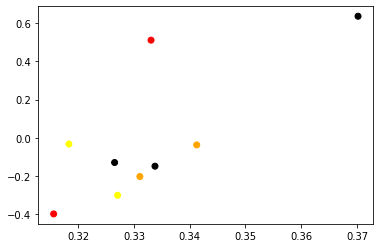

In [83]:
plt.scatter(pca_out_df[0], pca_out_df[1], c=colors)